# COVID-19 Data Science/Dashboard Building Project
### Importing Data / Exploratory Analysis

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use pd.read_csv() to read a CSV file into memory. 
Use r'C:\file.csv' to avoid a Unicode escape error (this creates a raw string where \ is treated as a literal character).

In [2]:
df = pd.read_csv(r'C:\Users\Turcanhydgoongod\Desktop\python csvs\COVID-19 Cases.csv')

Now that the data has been read into a dataframe object, we can use dataframe methods in pandas to begin to explore the data. Calling the .head() method displays the first 5 rows in the data by default. This allows us to view the data and determine if things were imported correctly, such as verifying that each variable is named. 

In [5]:
df.head()

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
0,3/11/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
1,3/11/2020,US,Arizona,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
2,3/11/2020,US,Arizona,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3,3/11/2020,US,Arizona,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
4,2/15/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.8162,-111.2845


The data _looks_ like it was imported correctly; Lat and Long (latitude and longitude) appear to be numeric, the Date variable values look like dates, and all variables are named. Let's get a sense of the size of the data we're working with using df.shape.

In [6]:
df.shape

(116880, 10)

The tuple returned by df.shape tells us (number of rows, number of columns). Notice that our index column, all the way on the left side of our df.head() output, is _not_ counted as a column by df.shape. 

If we want to get some more specific information about our variables, we can call df.describe() on that specific variable. There are multiple ways to access one specific variable or column of our dataframe, but we will use df['col_name']. Extracting one column in this way creates a pandas "Series" object. We can then call the .describe() method of that object.

In [32]:
print("First 5 observations of Date:\n",
      df['Date'].head(),
      '\n'*3,
      "Description of Date:\n",
df['Date'].describe()
     )

First 5 observations of Date:
 0    3/11/2020
1    3/11/2020
2    3/11/2020
3    3/11/2020
4    2/15/2020
Name: Date, dtype: object 


 Description of Date:
 count        116880
unique           60
top       1/23/2020
freq           1948
Name: Date, dtype: object


The describe method has counted the number of Date observations (which is same as the number of rows we returned from df.shape earlier), and has counted that there are 60 unique date values in this series. The 'top' date is the most frequently occurring value, which shows up 1948 times in our data. This should give us pause; we have 116880 observations, but only 60 are unique; thus we have data collected on 60 different days. Shouldn't it be true that all dates appear the same number of times in this data? One naive approach might be to divide 116880 by 60 and see if get 1948. Let's try that first.

In [36]:
df.shape[0] / df['Date'].describe()['freq']

60.0

Note that we have used indexing to extract the first positional value of df.shape and accessed the 'freq' element of the .describe object so that we did not have to search for and manually enter those values. We see that our operation returned 60.0; this might be a good indication that each of our 60 unique dates have 1948 observations. To make sure there isn't something strange going on, let's actuall get a count of how many times each of the 60 dates appear in the dataframe.

In [38]:
df['Date'].value_counts()

1/23/2020    1948
2/28/2020    1948
3/3/2020     1948
2/12/2020    1948
3/12/2020    1948
3/5/2020     1948
3/22/2020    1948
2/15/2020    1948
3/15/2020    1948
2/3/2020     1948
2/10/2020    1948
1/28/2020    1948
2/17/2020    1948
3/19/2020    1948
3/8/2020     1948
2/13/2020    1948
3/1/2020     1948
3/2/2020     1948
2/7/2020     1948
3/21/2020    1948
3/20/2020    1948
3/17/2020    1948
2/24/2020    1948
3/7/2020     1948
3/14/2020    1948
3/18/2020    1948
2/22/2020    1948
2/29/2020    1948
1/25/2020    1948
1/27/2020    1948
3/11/2020    1948
2/18/2020    1948
2/27/2020    1948
2/25/2020    1948
2/2/2020     1948
3/10/2020    1948
3/6/2020     1948
3/13/2020    1948
2/1/2020     1948
1/30/2020    1948
3/4/2020     1948
2/6/2020     1948
1/24/2020    1948
3/16/2020    1948
2/16/2020    1948
2/5/2020     1948
1/26/2020    1948
2/20/2020    1948
2/8/2020     1948
2/23/2020    1948
2/4/2020     1948
3/9/2020     1948
2/21/2020    1948
1/31/2020    1948
2/11/2020    1948
2/26/2020 

This output is long, and manually searching it for a value different from 1948 would be cumbersome in a larger data set. Let's check if any dates _don't_ occur 1948 times.

In [42]:
set(df['Date'].value_counts())

{1948}

The set of counts only contains 1948, so now we can be sure that each date appears in our data set exactly 1948 times. The 'top' date of 1/23/2020 that was reported is actually the _earliest_ date in the data.

In [51]:
sorted(df['Date'])[0:5] #The earliest 5 dates

['1/23/2020', '1/23/2020', '1/23/2020', '1/23/2020', '1/23/2020']

Let's describe all of our variables:

In [65]:
for name in df.columns:
    print(name,'\n'*2,df[name].describe(),'\n'*3)
    

Date 

 count        116880
unique           60
top       1/23/2020
freq           1948
Name: Date, dtype: object 



Country_Region 

 count     116880
unique       171
top           US
freq       58800
Name: Country_Region, dtype: object 



Province_State 

 count          78000
unique           131
top       California
freq            6480
Name: Province_State, dtype: object 



Case_Type 

 count     116880
unique         4
top       Active
freq       29220
Name: Case_Type, dtype: object 



Cases 

 count    116880.000000
mean         88.907974
std        1666.735704
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       67800.000000
Name: Cases, dtype: float64 



Difference 

 count    116880.000000
mean          5.739220
std         121.539456
min       -2743.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       14840.000000
Name: Difference, dtype: float64 



Prep_Flow_Runtime 

 count            

In [79]:
df.describe(include='all')

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
count,116880,116880,78000,116880,116880.000000,116880.000000,116880,116880,116880.000000,116880.000000
unique,60,171,131,4,NaN,NaN,1,1,NaN,NaN
top,1/23/2020,US,California,Active,NaN,NaN,3/23/2020 8:00:09 AM,3/22/2020,NaN,NaN
freq,1948,58800,6480,29220,NaN,NaN,116880,116880,NaN,NaN
mean,NaN,NaN,NaN,NaN,88.907974,5.739220,NaN,NaN,30.580962,-33.601551
std,NaN,NaN,NaN,NaN,1666.735704,121.539456,NaN,NaN,19.625721,80.981087
min,NaN,NaN,NaN,NaN,0.000000,-2743.000000,NaN,NaN,-41.454500,-157.858400
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,24.000000,-91.867800
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,37.545500,-73.794900
75%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,42.176700,22.937500


Prep_Flow_Runtime and Latest_Date only contain singular values, so we will drop those columns from the dataframe.

In [84]:
df.drop(['Prep_Flow_Runtime','Latest_Date'],axis=1,inplace=True)
df.head()

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Lat,Long
0,3/11/2020,US,Arizona,Recovered,0,0,32.0575,-111.6661
1,3/11/2020,US,Arizona,Deaths,0,0,32.0575,-111.6661
2,3/11/2020,US,Arizona,Confirmed,0,0,32.0575,-111.6661
3,3/11/2020,US,Arizona,Active,0,0,32.0575,-111.6661
4,2/15/2020,US,Arizona,Recovered,0,0,32.8162,-111.2845


We were able to see using .describe that the Date series is an object, but pandas has a specific type of DateTime object that would provide a better representation. Let's cast Date to DateTime.

In [105]:
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
df['Province_State'].value_counts()['Arizona']

960

Arizona has 960 values in the data, but we know  that we only have 60 unique dates, and 4 different rows for each combination of date and place corresponding to each Case_Type. Therefore, Province_State clearly does not uniquely identify the place we're talking about. The specific latitude and longitude of the observation should uniquely identify each place. Looking at the the first row and its associated values, let's track that specific Lat/Long in Arizona over the 60 dates and subset our data to include only those observations. We still want to preserve the full data set, so we will create a new dataframe.

In [107]:
lat_1 = df.iloc[0]['Lat']
long_1 = df.iloc[0]['Long']
US_AZ_1 = df[(df['Lat']==lat_1) & (df['Long']==long_1)]
US_AZ_1

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Lat,Long
0,2020-03-11,US,Arizona,Recovered,0,0,32.0575,-111.6661
1,2020-03-11,US,Arizona,Deaths,0,0,32.0575,-111.6661
2,2020-03-11,US,Arizona,Confirmed,0,0,32.0575,-111.6661
3,2020-03-11,US,Arizona,Active,0,0,32.0575,-111.6661
8,2020-01-30,US,Arizona,Recovered,0,0,32.0575,-111.6661
...,...,...,...,...,...,...,...,...
703,2020-03-03,US,Arizona,Active,0,0,32.0575,-111.6661
716,2020-02-09,US,Arizona,Recovered,0,0,32.0575,-111.6661
717,2020-02-09,US,Arizona,Deaths,0,0,32.0575,-111.6661
718,2020-02-09,US,Arizona,Confirmed,0,0,32.0575,-111.6661


We can see that we kept only the rows with our desired Lat and Long. 

In [108]:
US_AZ_1['Cases'].mean()

0.0

Well it looks like this location has no cases, so let's pick something more interesting.

In [109]:
df[df['Cases'] == df['Cases'].max()]

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Lat,Long
104166,2020-03-21,China,Hubei,Confirmed,67800,0,30.9756,112.2707
104222,2020-03-20,China,Hubei,Confirmed,67800,0,30.9756,112.2707
104342,2020-03-22,China,Hubei,Confirmed,67800,0,30.9756,112.2707
104382,2020-03-18,China,Hubei,Confirmed,67800,1,30.9756,112.2707
104398,2020-03-19,China,Hubei,Confirmed,67800,0,30.9756,112.2707


Let's define a new lat/long and filter our data again.

In [139]:
lat_2 = df[df['Cases'] == df['Cases'].max()].iloc[0]['Lat']
long_2 = df[df['Cases'] == df['Cases'].max()].iloc[0]['Long']
CN_HB_1 = df[(df['Lat'] == lat_2) & (df['Long'] == long_2)]
CN_HB_1.head()

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Lat,Long
104160,2020-03-05,China,Hubei,Recovered,40592,2035,30.9756,112.2707
104161,2020-03-05,China,Hubei,Deaths,2902,31,30.9756,112.2707
104162,2020-03-05,China,Hubei,Confirmed,67466,134,30.9756,112.2707
104163,2020-03-05,China,Hubei,Active,23972,-1932,30.9756,112.2707
104164,2020-03-21,China,Hubei,Recovered,58946,564,30.9756,112.2707


In [140]:
CN_HB_1_Conf = CN_HB_1[CN_HB_1['Case_Type']=='Confirmed']
CN_HB_1_Conf.set_index('Date',inplace=True)
CN_HB_1_Conf = CN_HB_1_Conf.sort_index()
CN_HB_1_Conf.head(10)

,Country_Region,Province_State,Case_Type,Cases,Difference,Lat,Long
Date,,,,,,,
2020-01-23,China,Hubei,Confirmed,444,0,30.9756,112.2707
2020-01-24,China,Hubei,Confirmed,549,105,30.9756,112.2707
2020-01-25,China,Hubei,Confirmed,761,212,30.9756,112.2707
2020-01-26,China,Hubei,Confirmed,1058,297,30.9756,112.2707
2020-01-27,China,Hubei,Confirmed,1423,365,30.9756,112.2707
2020-01-28,China,Hubei,Confirmed,3554,2131,30.9756,112.2707
2020-01-29,China,Hubei,Confirmed,3554,0,30.9756,112.2707
2020-01-30,China,Hubei,Confirmed,4903,1349,30.9756,112.2707
2020-01-31,China,Hubei,Confirmed,5806,903,30.9756,112.2707


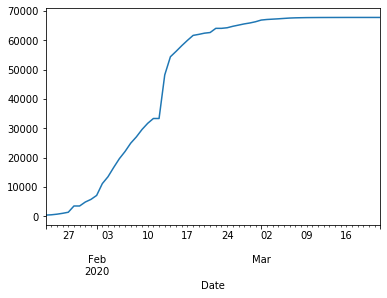

In [142]:
CN_HB_1_Conf['Cases'].plot()